# Proyek Analisis Data: AIR QUALITY DATASET
- **Nama:** PUJI AYUNINGTYAS
- **Email:** pujiayu8787@gmail.com
- **ID Dicoding:** PUJI AYUNINGTYAS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara konsentrasi Ozon (O3) dan kondisi meteorologi seperti titik embun (dew point) DEWP, kecepatan angin (WSPM),tekanan udara (PRES), dan suhu (TEMP)?
- Bagaimana hubungan antara konsentrasi O3 dan konsentrasi polutan seperti PM2,5 PM10 NO2 SO2 dan CO?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
path = "/content/drive/MyDrive/Dicoding/ANALISIS DATA PYTHON/Air-quality-dataset/PRSA_Data_20130301-20170228"



## Data Wrangling

### Gathering Data

In [ ]:
all_dataframes = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        df = pd.read_csv(file_path)
        all_dataframes.append(df)


In [ ]:
all_dataframes

[          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
 0          1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   
 1          2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   
 2          3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   
 3          4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   
 4          5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   
 ...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
 35059  35060  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0   
 35060  35061  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0   
 35061  35062  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0   
 35062  35063  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0   
 35063  35064  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   
 
        TEMP    PRES  DEWP  RAIN   wd  WSPM   stat

In [ ]:
df = all_dataframes[0]
for i in range(1, len(all_dataframes)):
    df = pd.concat([df, all_dataframes[i]], ignore_index=True)

In [ ]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
420764,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
420765,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
420766,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou


**Insight:**
- pada tahap pengumpulan data, dimana dapat dilakukan pengenalan dan pemetaan data. dataset ini merupakan rekaman catatan data polusi udara dari Beijing, China, dan mencakup berbagai variabel terkait kualitas udara dan kondisi lingkungan, seperti konsentrasi PM2.5, kelembaban, suhu, dan angin pada tahun 2013 sampai 2017.



- dataset ini berisi berbagai variabel terkait kualitas udara seperti PM2.5, PM10, SO2, NO2, CO, O3, serta variabel meteorologi seperti temperature (TEMP), pressure (PRES), wind direction (wd), wind speed (WSPM), dan lainnya. Selain itu, terdapat informasi waktu seperti year, month, day, hour, dan station.

In [ ]:
all_dataframes[2]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


### Assessing Data

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


**Insight:**
- tahap assessing data, dilakukan pengecekan terhadap nilai yang hilang (missing value) dan menganalisis untuk pengambilan keputusan terkait bagaimana cara menangani data yang hilang tersebut dengan tepat. misalnya, ketika dilakukan penghapusan data null, bagaimana resiko terhadap dataset.

### Cleaning Data

In [ ]:
data = df.interpolate(method='linear', limit_direction='forward', inplace=True)

<ipython-input-9-0e5ae58866cb>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = df.interpolate(method='linear', limit_direction='forward', inplace=True)


In [ ]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [ ]:
data = df.dropna(axis=0)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 418946 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       418946 non-null  int64  
 1   year     418946 non-null  int64  
 2   month    418946 non-null  int64  
 3   day      418946 non-null  int64  
 4   hour     418946 non-null  int64  
 5   PM2.5    418946 non-null  float64
 6   PM10     418946 non-null  float64
 7   SO2      418946 non-null  float64
 8   NO2      418946 non-null  float64
 9   CO       418946 non-null  float64
 10  O3       418946 non-null  float64
 11  TEMP     418946 non-null  float64
 12  PRES     418946 non-null  float64
 13  DEWP     418946 non-null  float64
 14  RAIN     418946 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     418946 non-null  float64
 17  station  418946 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 60.7+ MB


In [ ]:
data.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- terdapat sangat banyk data yang kosong, yang terdapat pada PM2.5 PM10 SO2 NO2 CO dan O3. apabila dilakukan penghapusan data null (drop null), akan mengakibatkan banyak informasi yang hilang. sehingga, untuk data yang kosong, dilakukan pengisian data dengan interpolate data.
- pada data WD, masih terdapat data null dikarenakan bukan tipe data float. tidak dapat dilakukan handling missing value dengan interpolasi, dan dengan mempertimbangkan jumlah data yang kosong, maka dilakukan penghapusan data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
unique_values = data['wd'].value_counts()
print(unique_values)

wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


In [ ]:
label_encoder_wd = LabelEncoder()
label_encoder_station = LabelEncoder()

data['wd_numeric'] = label_encoder_wd.fit_transform(data['wd'])
data['station_numeric'] = label_encoder_station.fit_transform(data['station'])

print(data)

           No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0           1  2013      3    1     0    4.0   4.0  14.0  20.0   300.0  69.0   
1           2  2013      3    1     1    4.0   4.0  13.0  17.0   300.0  72.0   
2           3  2013      3    1     2    3.0   3.0  10.0  19.0   300.0  69.0   
3           4  2013      3    1     3    3.0   6.0   7.0  24.0   400.0  62.0   
4           5  2013      3    1     4    3.0   6.0   5.0  14.0   400.0  71.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
420763  35060  2017      2   28    19   16.0  28.0   2.0  19.0   300.0  95.0   
420764  35061  2017      2   28    20   21.0  34.0   4.0  24.0   500.0  80.0   
420765  35062  2017      2   28    21   17.0  33.0   2.0  39.0   900.0  60.0   
420766  35063  2017      2   28    22   11.0  29.0   3.0  32.0  1400.0  69.0   
420767  35064  2017      2   28    23   11.0  20.0   2.0  27.0   400.0  77.0   

        TEMP    PRES  DEWP  RAIN   wd  

<ipython-input-15-08061b4cc4f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['wd_numeric'] = label_encoder_wd.fit_transform(data['wd'])
<ipython-input-15-08061b4cc4f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['station_numeric'] = label_encoder_station.fit_transform(data['station'])


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana korelasi antara konsentrasi polutan Ozon (O3) dan kondisi meteorologi seperti titik embun (dew point) DEWP, kecepatan angin (WSPM),tekanan udara (PRES), dan suhu (TEMP)?

<Axes: >

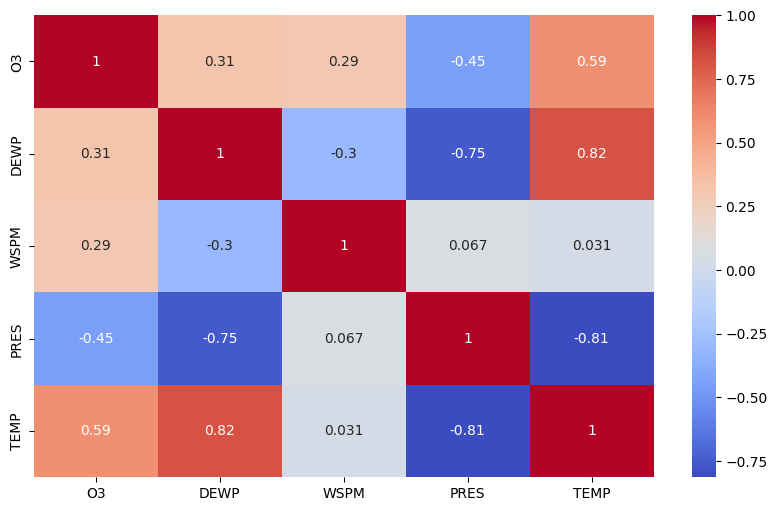

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[
    ['O3','DEWP','WSPM','PRES','TEMP']
    ].corr(), annot=True, cmap='coolwarm')

In [ ]:
correlation = data['O3'].corr(data['TEMP'])
print(f'Korelasi antara O3 dan TEMP: {correlation}')


Korelasi antara O3 dan TEMP: 0.5924397682556254


### Analisis pertanyaan 1:

diantara kondisi meteorologi seperti DEWP, WSPM, PRES, TEMP, ozon atau O3 memiliki korelasi paling kuat dengan TEMP (suhu) yaitu sebesar 0.59. Korelasi yang dimiliki oleh Ozon dengan suhu merupakan korelasi positif. Hal ini dikarenakan ozon biasanya terbentuk lebih banyak pada hari-hari yang lebih panas, terutama di daerah perkotaan, karena adanya reaksi fotokimia yang dipicu oleh sinar matahari dan suhu tinggi (disebut "fenomena smog fotokimia").

### Pertanyaan 2:

Bagaimana hubungan antara konsentrasi O3 dan konsentrasi polutan seperti PM2,5 PM10 NO2 SO2 dan CO?

<Axes: >

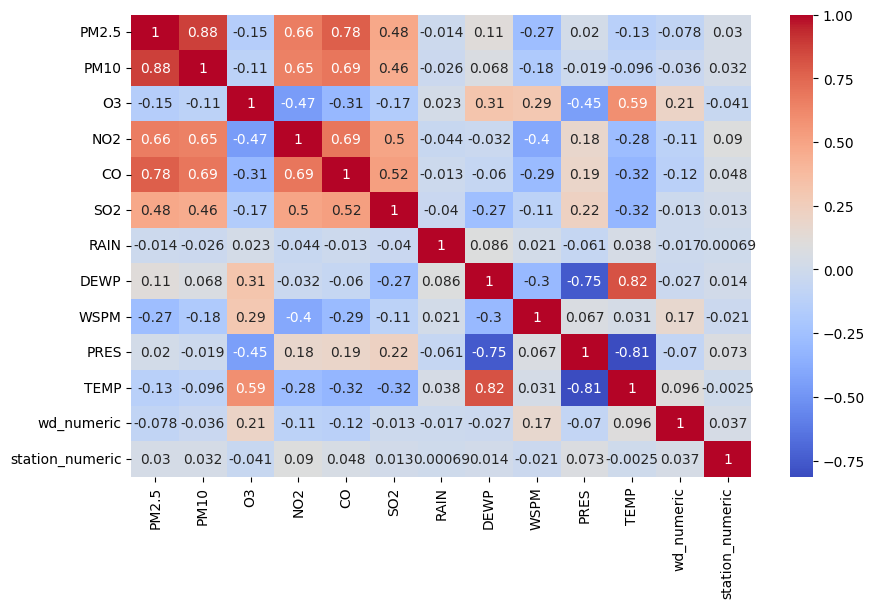

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[
    ['PM2.5','PM10','O3','NO2','CO','SO2','RAIN','DEWP','WSPM','PRES','TEMP','wd_numeric', 'station_numeric']
    ].corr(), annot=True, cmap='coolwarm')

**Insight:**
- Korelasi negatif antara ozon dan NO2 masih terkait dengan fenomena smog fotokimia, di mana ozon terbentuk melalui pemecahan NO2. Ini mengindikasikan bahwa proses fotokimia yang membentuk ozon juga mengurangi konsentrasi NO2 di atmosfer.

- Korelasi lemah hingga sedang antara ozon dan polutan lainnya seperti PM2.5, PM10, SO2, dan CO menunjukkan bahwa ozon tidak berkorelasi kuat dengan konsentrasi partikel atau polutan gas-gas tersebut. Hal ini dapat disebabkan oleh fakta bahwa sumber polusi partikel dan polusi gas lainnya berbeda dengan proses pembentukan ozon, yang sangat bergantung pada sinar matahari dan reaksi kimia atmosfer.

## Analisis Lanjutan (Opsional)

Korelasi antara Polutan dan Faktor Meteorologi

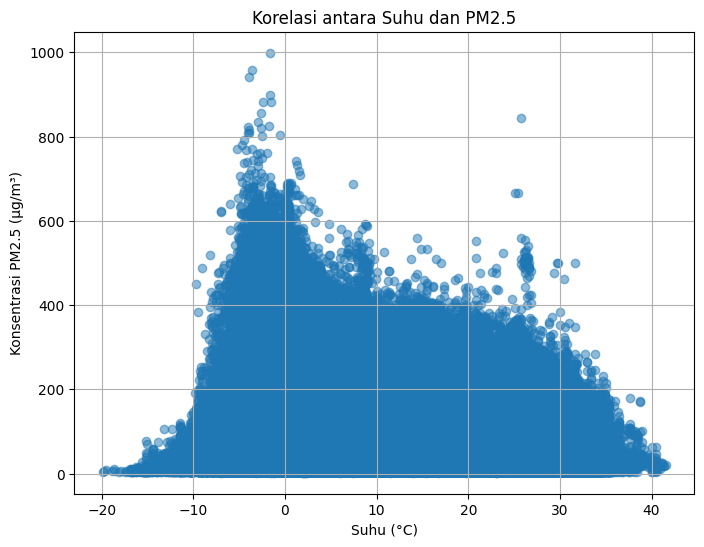

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['TEMP'], data['PM2.5'], alpha=0.5)
plt.title('Korelasi antara Suhu dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


## Conclusion

### - Conclution pertanyaan 1
Pengaruh Kondisi Meteorologi: Suhu (TEMP) memiliki korelasi paling kuat dengan ozon, menunjukkan bahwa cuaca panas meningkatkan konsentrasi ozon, yang sesuai dengan pemahaman umum tentang smog fotokimia. Tekanan udara (PRES) juga memiliki hubungan negatif sedang, yang menunjukkan bahwa tekanan rendah memfasilitasi peningkatan ozon. Faktor lain seperti titik embun (DEWP) dan kecepatan angin (WSPM) memiliki pengaruh yang lebih kecil, tetapi tetap signifikan.

### - Conclution pertanyaan 2


Hubungan dengan Polutan: Korelasi negatif sedang antara ozon dan NO2 adalah yang paling menonjol di antara polutan lain, yang sesuai dengan mekanisme fotokimia pembentukan ozon. Polutan lain seperti PM2.5, PM10, SO2, dan CO memiliki hubungan yang lebih lemah dengan ozon, menunjukkan bahwa ozon terbentuk secara independen dari konsentrasi partikel polutan tersebut.

### -----------------

Secara keseluruhan, ozon cenderung meningkat pada cuaca panas, tekanan rendah, dan ketika ada sedikit polutan seperti NO2 dan CO yang berperan dalam pembentukannya.